# Caso Regresión: Compañía Sector Textil

## 1. Entendimiento del Problema

Garments Industry es una compañia del sector textil con muchas actividades manuales. Su éxito está en que las prendas son "hechas a mano", por lo que medir la productividad de sus empleados se vuelve esencial para mejorar las utilidades de la organización. Es por esto que la compañía quiere estimar los niveles de productivdiad de sus empleados para mejorare la operación y mantener los ingresos esperados, además, identificar herramientas para mejorar el día a día de sus empleados

## 2. Enfoque analítico

Construir un modelo de regresión para predecir la productividad de cada empleado con un MAPE menor al al 20% (Probabilidad superior al 80%)

## 3. Requerminientos de Datos

- Se requieren datos del trabajador en su puesto de trabajo particular
- Se requieren mediciones del puesto de trabajo (tiempos, cantidad de prendas, momentos de ocio, cantidad de personas)
- Se requiere una medición inicial de la productividad

## 4. Recolección de Datos

- date: Fecha de medición de la productividad
- quarter: Trimestre de la medición
- department: Área de trabajo en particular
- day: Nombre del día en el que se hizo la medición
- team: Número del equipo de trabajo
- target_productivity: Productividad objetivo del área de trabajo
- smv: Valor de tiempo estándar en minutos de la actividad
- wip: Cantidad de trabajo en proceso (Unidades)
- over_time: Tiempo de operación
- incentive: Porcentaje de incentivos al área de trabajo
- idle_time: Tiempo de parada
- idle_men: Cantidad de trabajadors quietos en el tiempo de aparada
- no_of_style_change: Cantidad de cambios de estilo en la producción
- no_of_workers: Cantidad total de trabajadores
- actual_productivity: Productividad actual (y)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../Datasets/garments_worker_productivity.csv')
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


## 5. Entendimiento de los Datos

### Datos Nulos

La variable "wip" se debería eliminar en términos estadísticos pero es muy importante para el caso del negocio

<Axes: >

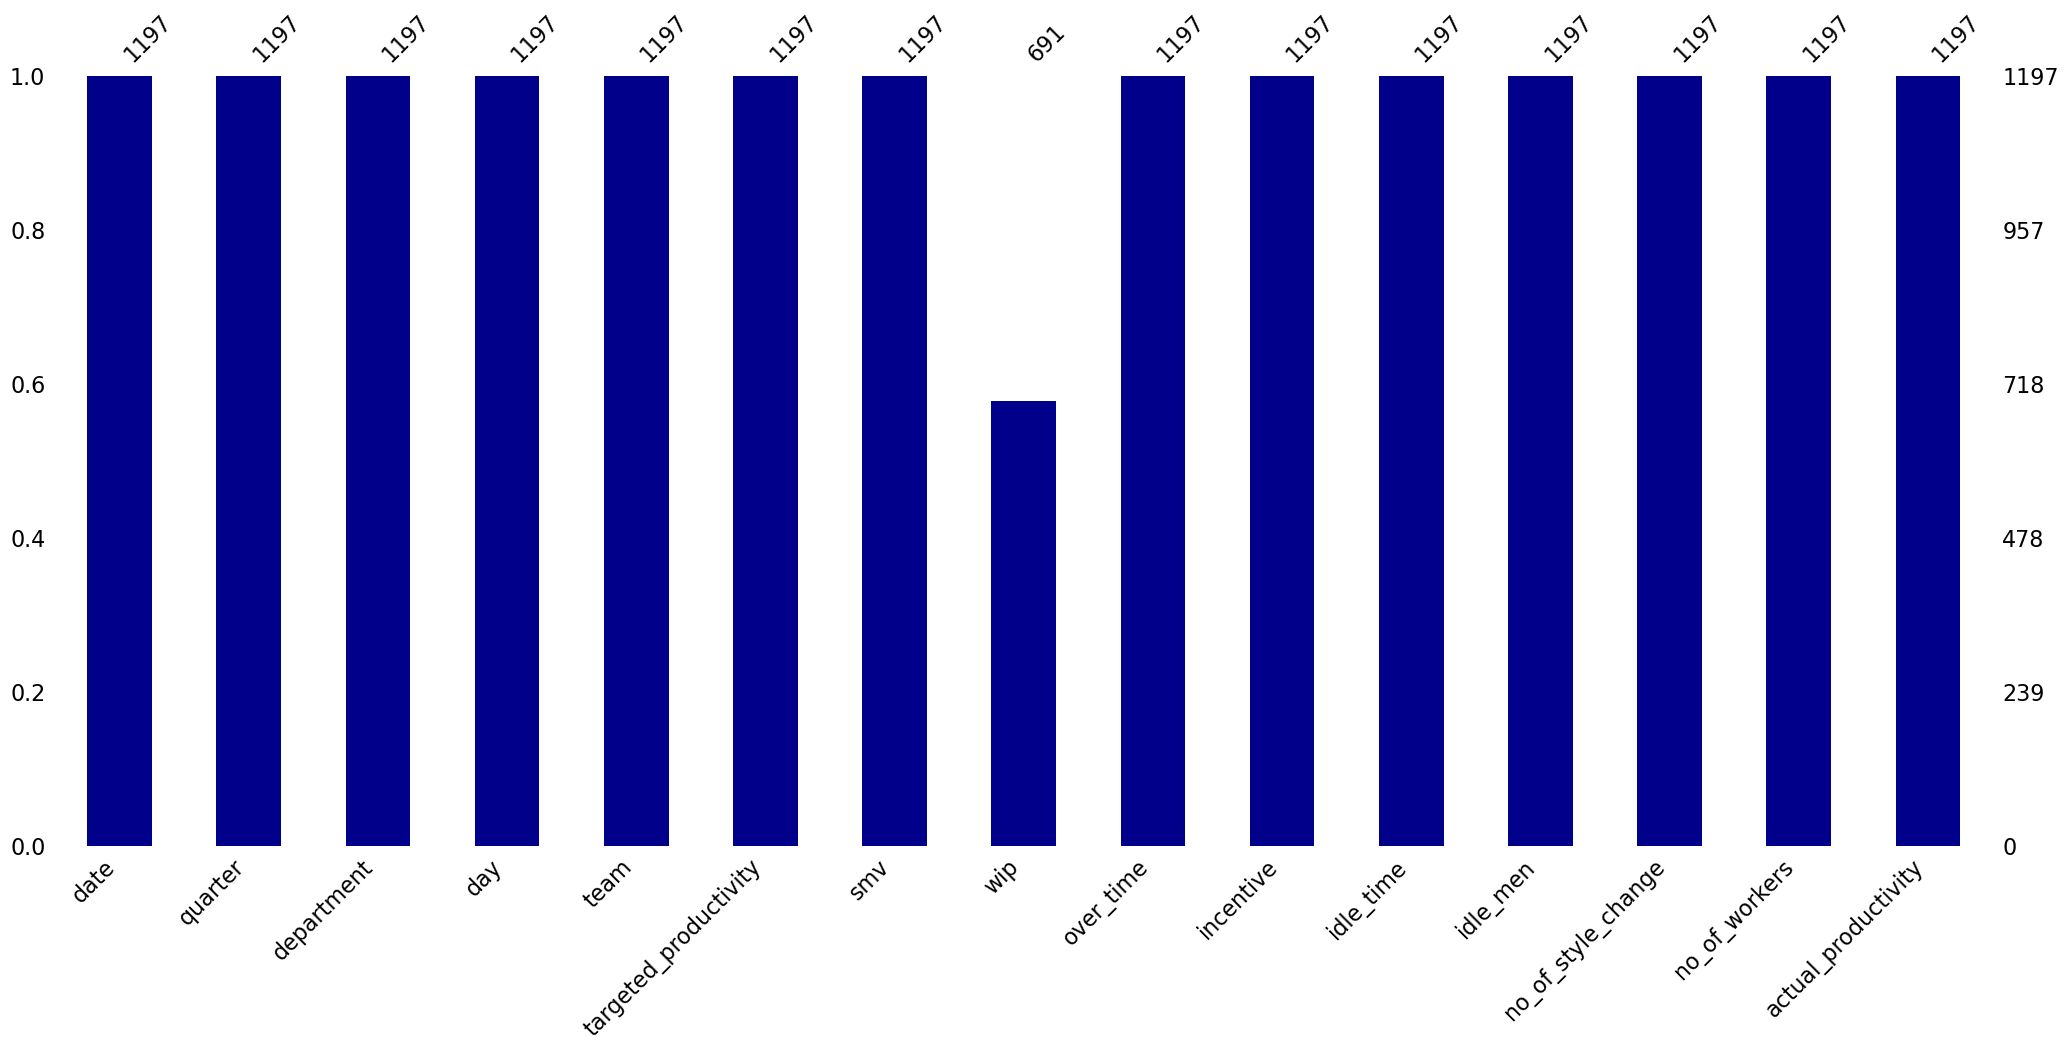

In [3]:
msno.bar(data, color="darkblue")

### Análisis de variable Y

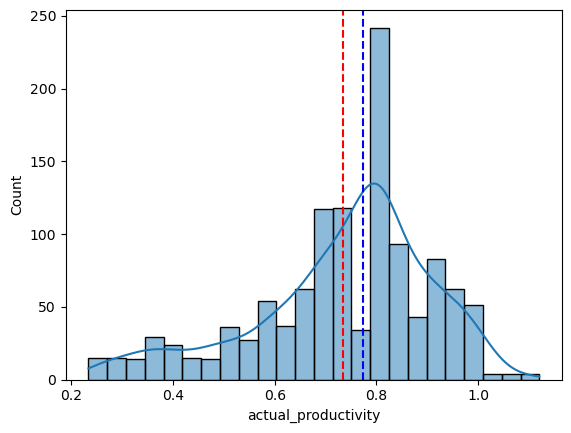

In [4]:
sns.histplot(data, x = "actual_productivity", kde=True)
plt.axvline(data["actual_productivity"].mean(), color='red', linestyle='--')
plt.axvline(data["actual_productivity"].median(), color='blue', linestyle='--')
plt.show(9)

### Histogramas de Frecuencia

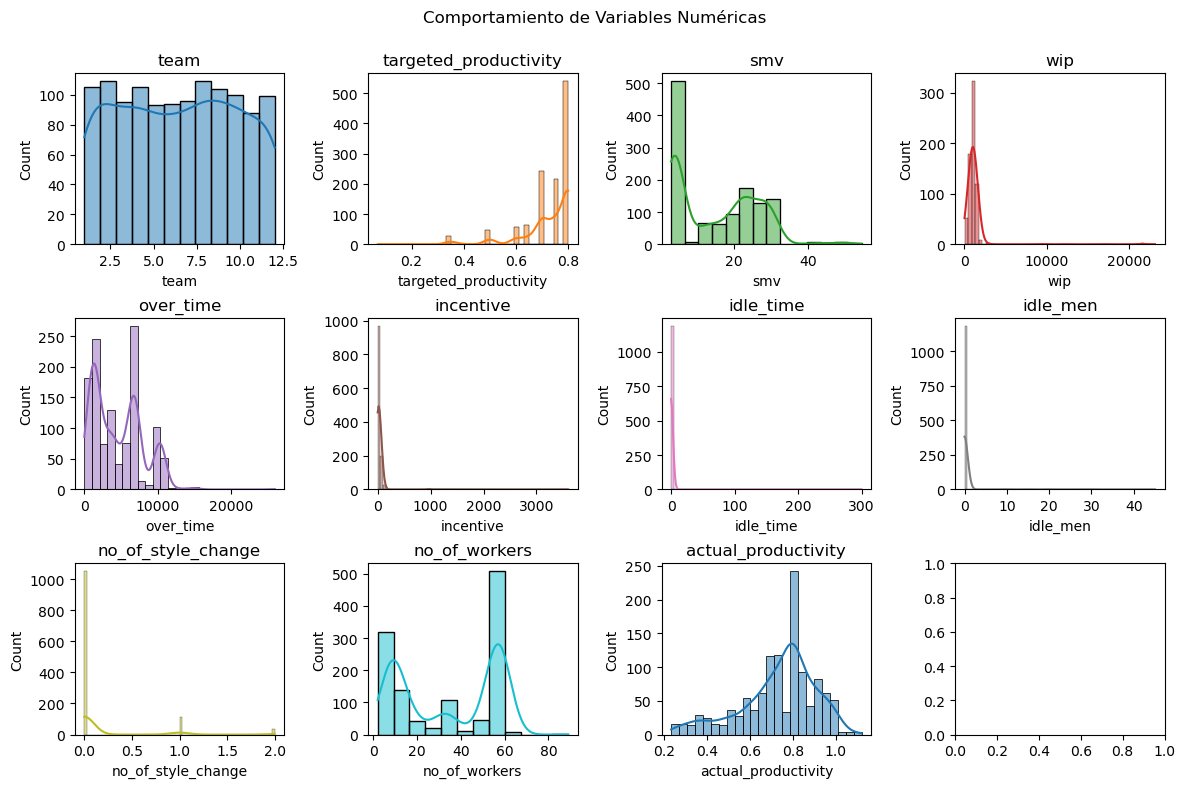

In [5]:
fig, ax = plt.subplots(3, 4, figsize = (12, 8))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sns.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

### Gráficos de Torta

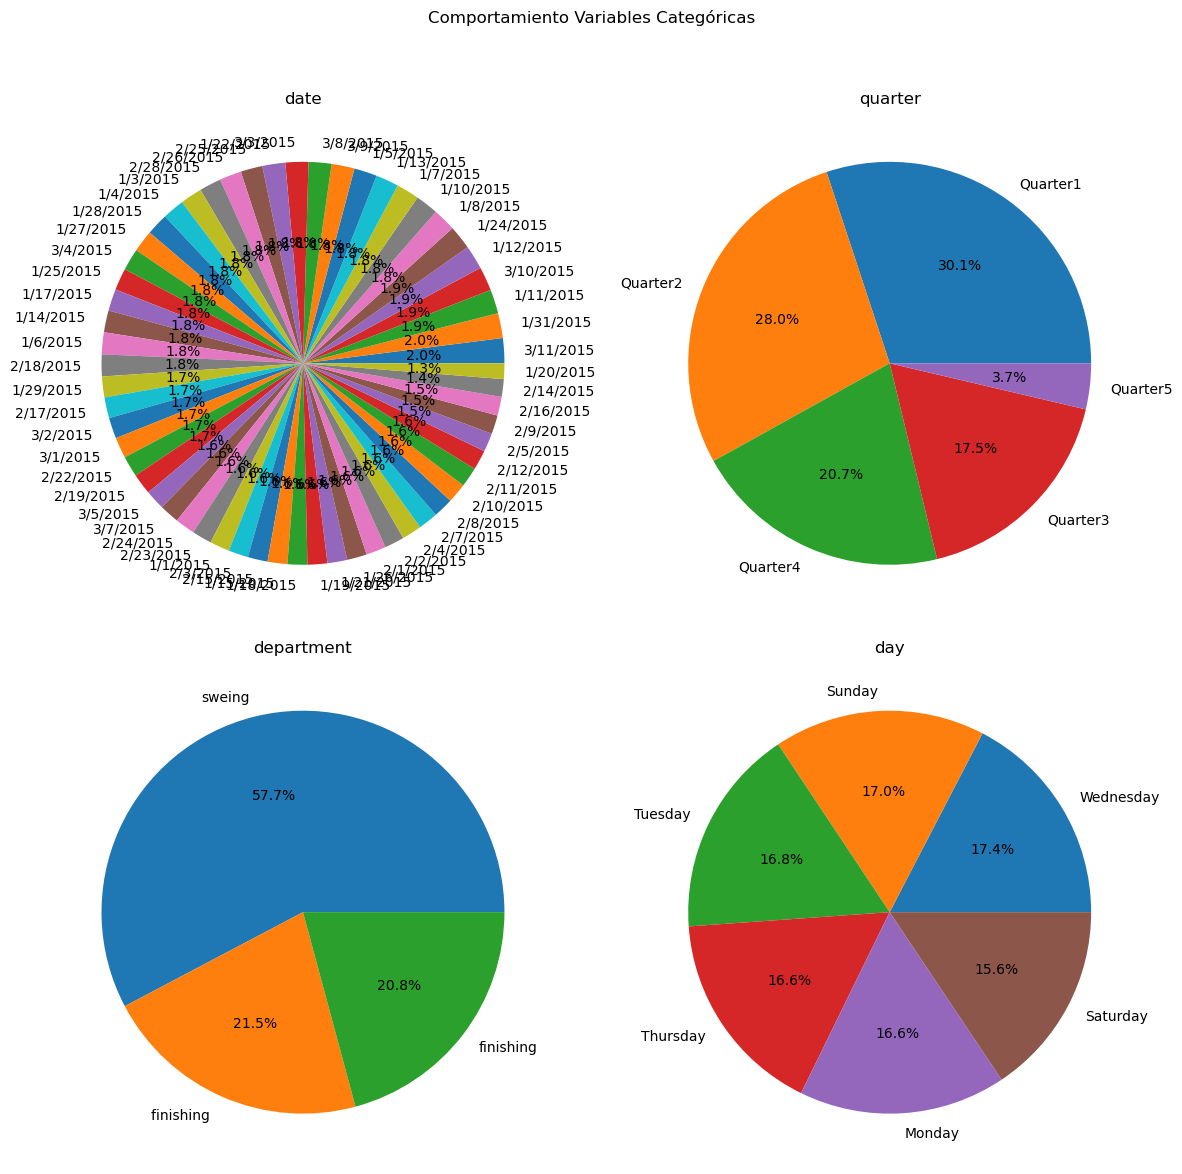

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

### Factor de Correlación

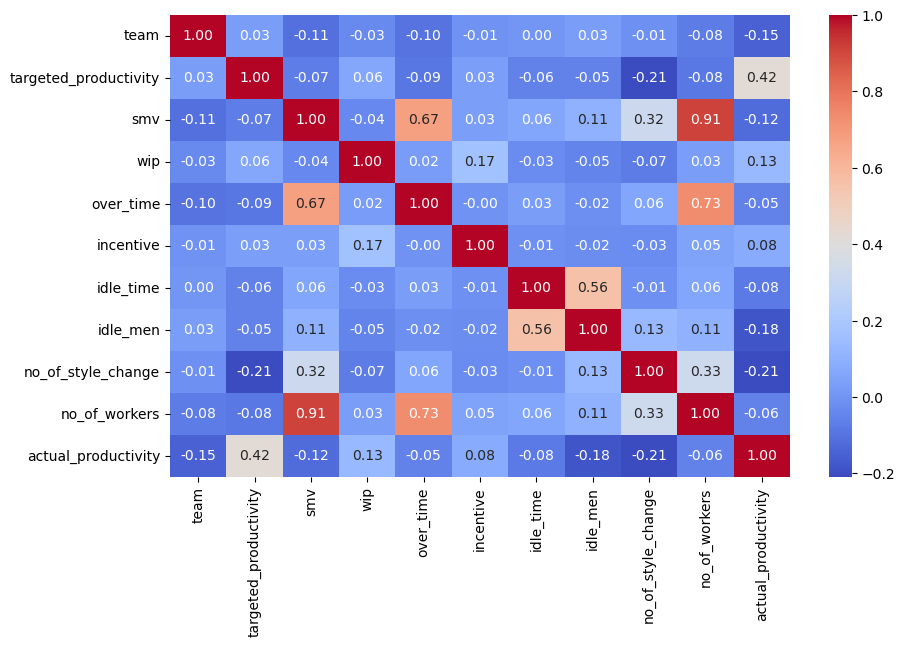

In [7]:
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

## 6. Preparación de los datos

### Transformación Ordinal

In [8]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

In [9]:
categorical_cols = data.select_dtypes(include = ['object']).columns
categorical_transformer = make_column_transformer((OrdinalEncoder(), categorical_cols), remainder="passthrough")
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['date', 'quarter', 'department', 'day'], dtype='object'))])

In [10]:
data_transformed = pd.DataFrame(categorical_transformer.fit_transform(data), 
                                columns = categorical_transformer.get_feature_names_out(),
                                index = data.index).rename(
                                    columns = lambda x: x.removeprefix('ordinalencoder__')).rename(
                                    columns = lambda x: x.removeprefix ('remainder__')
                                    )

data_transformed                                

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.0,0.0,2.0,3.0,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0,0.940725
1,0.0,0.0,1.0,3.0,1.0,0.75,3.94,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,0.0,0.0,2.0,3.0,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,0.0,0.0,2.0,3.0,12.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,0.0,0.0,2.0,3.0,6.0,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51.0,1.0,0.0,5.0,10.0,0.75,2.90,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,51.0,1.0,0.0,5.0,8.0,0.70,3.90,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,51.0,1.0,0.0,5.0,7.0,0.65,3.90,NaN,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,51.0,1.0,0.0,5.0,9.0,0.75,2.90,NaN,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


### Imputación

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [12]:
imputer = IterativeImputer(estimator=DecisionTreeRegressor(),
                           initial_strategy='mean',
                           max_iter=10)

data_recursive = pd.DataFrame(imputer.fit_transform(data_transformed), 
                              columns=data_transformed.columns,
                              index=data_transformed.index)

data_recursive

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.0,0.0,2.0,3.0,8.0,0.80,26.16,1108.0,7080.0,98.0,0.0,0.0,0.0,59.0,0.940725
1,0.0,0.0,1.0,3.0,1.0,0.75,3.94,813.0,960.0,0.0,0.0,0.0,0.0,8.0,0.886500
2,0.0,0.0,2.0,3.0,11.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
3,0.0,0.0,2.0,3.0,12.0,0.80,11.41,968.0,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570
4,0.0,0.0,2.0,3.0,6.0,0.80,25.90,1170.0,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,51.0,1.0,0.0,5.0,10.0,0.75,2.90,813.0,960.0,0.0,0.0,0.0,0.0,8.0,0.628333
1193,51.0,1.0,0.0,5.0,8.0,0.70,3.90,813.0,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1194,51.0,1.0,0.0,5.0,7.0,0.65,3.90,813.0,960.0,0.0,0.0,0.0,0.0,8.0,0.625625
1195,51.0,1.0,0.0,5.0,9.0,0.75,2.90,813.0,1800.0,0.0,0.0,0.0,0.0,15.0,0.505889


In [13]:
data_imputed = data_recursive.copy()
data_imputed[categorical_cols] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X = data_recursive[categorical_cols]))

<Axes: >

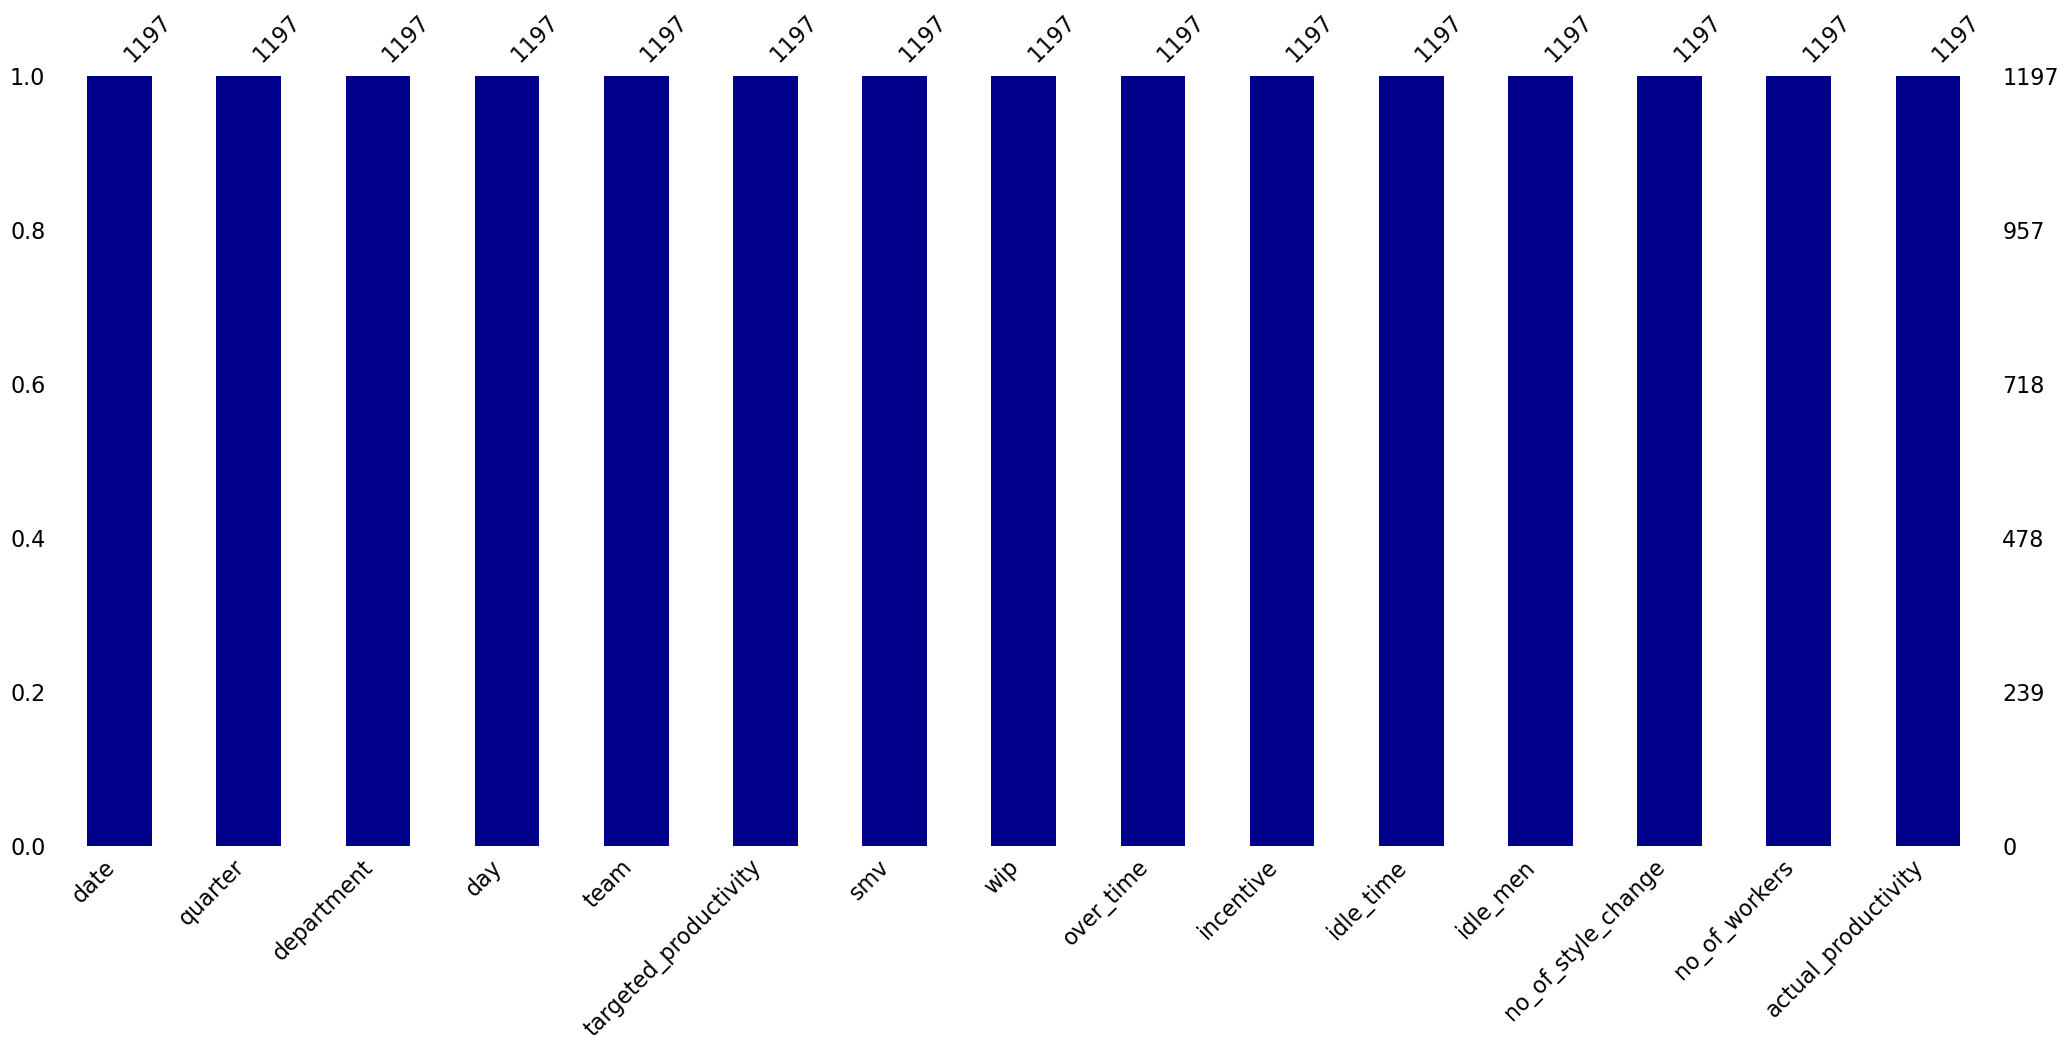

In [14]:
msno.bar(data_imputed, color="darkblue")

### Eliminar variables

In [15]:
data_imputed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1173.074353,2200.864307,7.000000,629.000000,925.000000,1247.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [16]:
data_mod = data_imputed.drop(columns = ['team', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'incentive'])

In [17]:
data_mod = data_imputed.drop(['team', 'no_of_style_change', 'no_of_workers', 'incentive', 'idle_men', 'idle_time'], axis=1)
data_mod['department'].replace({'finishing ': 'finishing'}, inplace=True)
data_mod['date'] = pd.to_datetime(data_mod['date'], format='%m/%d/%Y')
data_mod['num_day'] = [i.day for i in data_mod.date]
data_mod['month'] = [i.month for i in data_mod.date]
data_mod.drop('date', axis=1, inplace=True)
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   targeted_productivity  1197 non-null   float64
 4   smv                    1197 non-null   float64
 5   wip                    1197 non-null   float64
 6   over_time              1197 non-null   float64
 7   actual_productivity    1197 non-null   float64
 8   num_day                1197 non-null   int64  
 9   month                  1197 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 93.6+ KB


### Transformación de los datos

In [18]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
num_col = data_mod.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = data_mod.select_dtypes(include = ['object']).columns.to_list()

numtrans = Pipeline(steps=[("scale", MinMaxScaler())])
cattrans = Pipeline(steps=[("encoder", OneHotEncoder(sparse_output=True))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numtrans, num_col),
        ('cat', cattrans, cat_col)
    ],
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 ['targeted_productivity', 'smv', 'wip',
                                  'over_time', 'actual_productivity', 'num_day',
                                  'month']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['quarter', 'department', 'day'])])

In [20]:
data_pre = preprocessor.fit_transform(data_mod)
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate((num_col, cod_cat))
data_pro = pd.DataFrame(data_pre, columns=labels)
data_pro

,targeted_productivity,smv,wip,over_time,actual_productivity,num_day,month,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1.000000,0.450252,0.047631,0.273148,0.797332,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.931507,0.020132,0.034869,0.037037,0.736180,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.164731,0.041575,0.141204,0.639274,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.000000,0.164731,0.041575,0.141204,0.639274,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.000000,0.445219,0.050314,0.074074,0.639062,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,0.931507,0.000000,0.034869,0.037037,0.445036,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1193,0.863014,0.019357,0.034869,0.037037,0.441982,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1194,0.794521,0.019357,0.034869,0.037037,0.441982,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1195,0.931507,0.000000,0.034869,0.069444,0.306951,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Conjunto de Entrenamiento

In [21]:
from sklearn.model_selection import train_test_split

El tamaño del conjunto de entrenamiento es (837, 19) (837, 1)
El tamaño del conjunto de validación es (360, 19) (360, 1)


<Axes: xlabel='actual_productivity', ylabel='Count'>

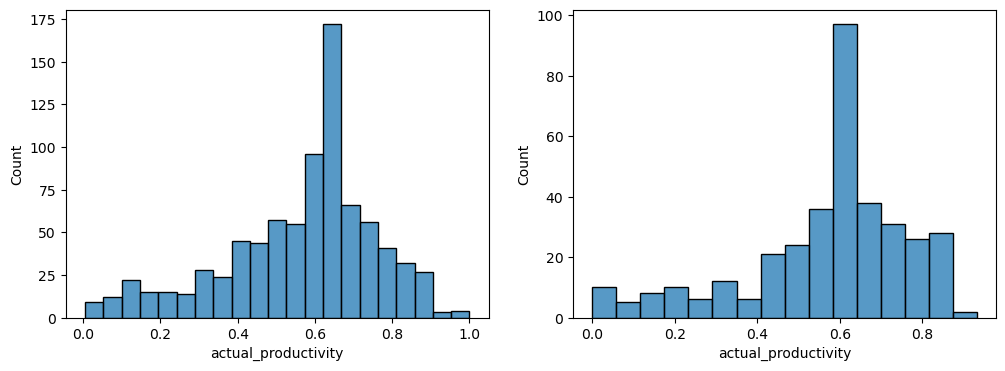

In [22]:
X = data_pro.drop('actual_productivity', axis=1)
y = data_pro[['actual_productivity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
print(f'El tamaño del conjunto de entrenamiento es {X_train.shape} {y_train.shape}\nEl tamaño del conjunto de validación es {X_test.shape} {y_test.shape}')
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=y_train, x='actual_productivity', ax=ax[0])
sns.histplot(data=y_test, x='actual_productivity', ax=ax[1])

## Modelos

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [24]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Regresión Lineal

In [25]:
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)

LinearRegression()

In [26]:
modelo_1.coef_

array([[ 5.63338852e-01, -1.58644609e-01,  1.89167308e-01,
         1.27501421e-01, -2.27363908e-02, -2.95350277e-02,
        -1.67661760e-02, -4.82639596e-03, -5.11850773e-02,
        -3.07304773e-02,  1.03508127e-01, -1.04048482e-02,
         1.04048482e-02, -6.97925023e-03,  5.68373692e-06,
        -2.16676986e-02, -1.51742907e-02,  3.05745311e-02,
         1.32410246e-02]])

In [27]:
modelo_1.intercept_

array([0.09923664])

In [28]:
pred_train_1 = modelo_1.predict(X_train)
pred_test_1 = modelo_1.predict(X_test)
# Desecalamiento con fórmula matemática
pred_train_desc_1 = pred_train_1 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc_1 = pred_test_1 * (np.max(y) - np.min(y)) + np.min(y)
y_train_desc = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc = y_test * (np.max(y) - np.min(y)) + np.min(y)

R2 entrenamiento: 0.2264404177121495
MAE entrenamiento: 0.12186848576539261
RMSE entrenamiento: 0.17201506648079468
MAPE entrenamiento: 0.7467530787507519


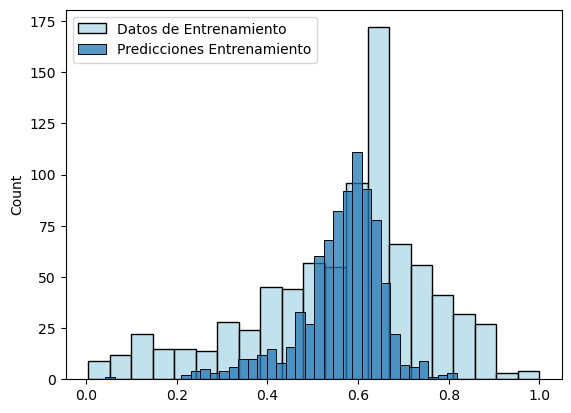

In [29]:
r2_train_1 = r2_score(y_train_desc, pred_train_desc_1)
mae_train_1 = mean_absolute_error(y_train_desc, pred_train_desc_1)
rmse_train_1 = root_mean_squared_error(y_train_desc, pred_train_desc_1)
mape_train_1 = mean_absolute_percentage_error(y_train_desc, pred_train_desc_1)

print(f'R2 entrenamiento: {r2_train_1}')
print(f'MAE entrenamiento: {mae_train_1}')
print(f'RMSE entrenamiento: {rmse_train_1}')
print(f'MAPE entrenamiento: {mape_train_1}')

sns.histplot(y_train_desc.values.flatten(), label='Datos de Entrenamiento', color='lightblue')
sns.histplot(pred_train_desc_1.flatten(), label='Predicciones Entrenamiento')
plt.legend()
plt.show()

R2 prueba: 0.20125112193991146
MAE prueba: 0.12933415276720386
RMSE prueba: 0.17789339846984192
MAPE prueba: 6323918570198.211


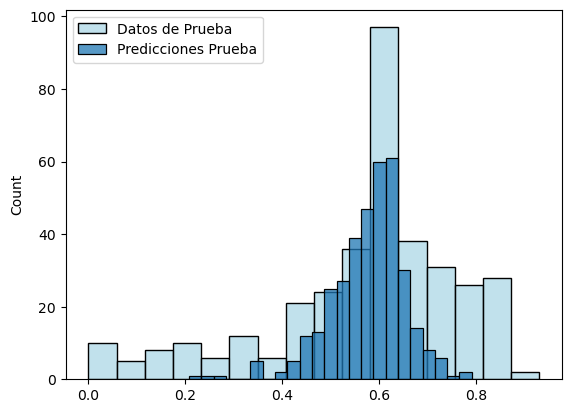

In [30]:
r2_test_1 = r2_score(y_test_desc, pred_test_desc_1)
mae_test_1 = mean_absolute_error(y_test_desc, pred_test_desc_1)
rmse_test_1 = root_mean_squared_error(y_test_desc, pred_test_desc_1)
mape_test_1 = mean_absolute_percentage_error(y_test_desc, pred_test_desc_1)

print(f'R2 prueba: {r2_test_1}')
print(f'MAE prueba: {mae_test_1}')
print(f'RMSE prueba: {rmse_test_1}')
print(f'MAPE prueba: {mape_test_1}')

sns.histplot(y_test_desc.values.flatten(), label='Datos de Prueba', color='lightblue')
sns.histplot(pred_test_desc_1.flatten(), label='Predicciones Prueba')
plt.legend()
plt.show()

### K Vecinos

In [31]:
modelo_2 = KNeighborsRegressor()
param_grid = {'n_neighbors': [2, 3, 100, 5, 12, 40, 21, 35], 'p': [1, 2]}
reg_1 = GridSearchCV(modelo_2, param_grid, cv=3, scoring='r2')
reg_1.fit(X_train, y_train)
validation = pd.concat([pd.DataFrame(reg_1.cv_results_['params']), 
                        pd.DataFrame(reg_1.cv_results_['mean_test_score'], columns= ['R2'])], axis = 1)
validation.sort_values('R2', ascending=False)

,n_neighbors,p,R2
13,21,2,0.109026
12,21,1,0.098457
14,35,1,0.083338
15,35,2,0.081104
10,40,1,0.074630
11,40,2,0.070220
4,100,1,0.040357
5,100,2,0.034116
8,12,1,0.029526
9,12,2,0.027450


In [32]:
modelo_2 = KNeighborsRegressor()
param_grid = {'n_neighbors': [2, 3, 100, 5, 12, 40, 21, 35], 'p': [1, 2]}
reg_2 = GridSearchCV(modelo_2, param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_2.fit(X_train, y_train)
validation = pd.concat([pd.DataFrame(reg_2.cv_results_['params']), 
                        pd.DataFrame(reg_2.cv_results_['mean_test_score'], columns= ['MAPE'])], axis = 1)
validation.sort_values('MAPE', ascending=False)

,n_neighbors,p,MAPE
15,35,2,-0.824492
11,40,2,-0.824897
14,35,1,-0.834365
10,40,1,-0.835550
13,21,2,-0.844544
1,2,2,-0.845015
4,100,1,-0.847025
5,100,2,-0.848056
12,21,1,-0.850484
0,2,1,-0.867921


In [33]:
modelo_2_final = reg_2.best_estimator_
modelo_2_final

KNeighborsRegressor(n_neighbors=35)

In [34]:
pred_train_2 = modelo_2_final.predict(X_train)
pred_test_2 = modelo_2_final.predict(X_test)
# Desecalamiento con fórmula matemática
pred_train_desc_2 = pred_train_2 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc_2 = pred_test_2 * (np.max(y) - np.min(y)) + np.min(y)
y_train_desc = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc = y_test * (np.max(y) - np.min(y)) + np.min(y)

R2 entrenamiento: 0.17755810057794064
MAE entrenamiento: 0.13471202230190327
RMSE entrenamiento: 0.17736675325352785
MAPE entrenamiento: 0.816615175807909


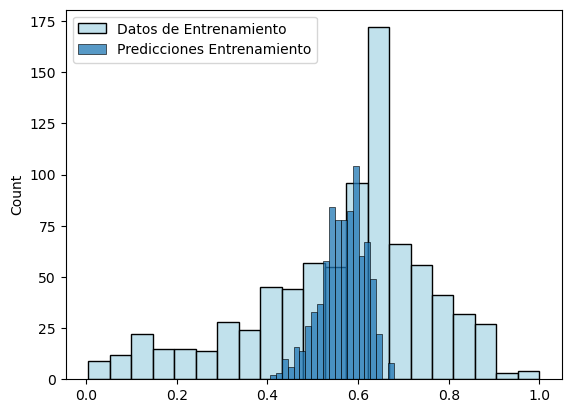

In [35]:
r2_train_2 = r2_score(y_train_desc, pred_train_desc_2)
mae_train_2 = mean_absolute_error(y_train_desc, pred_train_desc_2)
rmse_train_2 = root_mean_squared_error(y_train_desc, pred_train_desc_2)
mape_train_2 = mean_absolute_percentage_error(y_train_desc, pred_train_desc_2)

print(f'R2 entrenamiento: {r2_train_2}')
print(f'MAE entrenamiento: {mae_train_2}')
print(f'RMSE entrenamiento: {rmse_train_2}')
print(f'MAPE entrenamiento: {mape_train_2}')

sns.histplot(y_train_desc.values.flatten(), label='Datos de Entrenamiento', color='lightblue')
sns.histplot(pred_train_desc_2.flatten(), label='Predicciones Entrenamiento')
plt.legend()
plt.show()

R2 prueba: 0.08616345865666308
MAE prueba: 0.1450544138515989
RMSE prueba: 0.190278168016223
MAPE prueba: 6998537005784.204


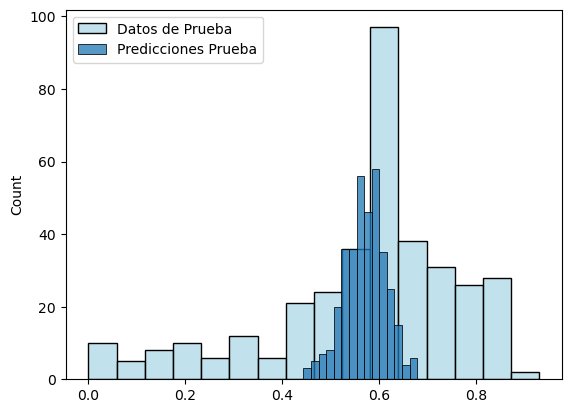

In [36]:
r2_test_2 = r2_score(y_test_desc, pred_test_desc_2)
mae_test_2 = mean_absolute_error(y_test_desc, pred_test_desc_2)
rmse_test_2 = root_mean_squared_error(y_test_desc, pred_test_desc_2)
mape_test_2 = mean_absolute_percentage_error(y_test_desc, pred_test_desc_2)

print(f'R2 prueba: {r2_test_2}')
print(f'MAE prueba: {mae_test_2}')
print(f'RMSE prueba: {rmse_test_2}')
print(f'MAPE prueba: {mape_test_2}')

sns.histplot(y_test_desc.values.flatten(), label='Datos de Prueba', color='lightblue')
sns.histplot(pred_test_desc_2.flatten(), label='Predicciones Prueba')
plt.legend()
plt.show()

### MSV

In [37]:
modelo_3 = SVR()
param_grid = {'C': [0, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf'], 'degree':[2,3]}
reg_3 = GridSearchCV(modelo_3, param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_3.fit(X_train, y_train)
validation = pd.concat([pd.DataFrame(reg_3.cv_results_['params']), 
                        pd.DataFrame(reg_3.cv_results_['mean_test_score'], columns= ['MAPE'])], axis = 1)
validation.sort_values('MAPE', ascending=False)

,C,degree,kernel,MAPE
27,10.00,3,linear,-0.762123
24,10.00,2,linear,-0.762123
18,1.00,2,linear,-0.762193
21,1.00,3,linear,-0.762193
28,10.00,3,poly,-0.768295
25,10.00,2,poly,-0.771579
22,1.00,3,poly,-0.772072
26,10.00,2,rbf,-0.779031
29,10.00,3,rbf,-0.779031
15,0.10,3,linear,-0.782860


In [38]:
modelo_3_final = reg_3.best_estimator_
modelo_3_final

SVR(C=10, degree=2, kernel='linear')

In [39]:
pred_train_3 = modelo_3_final.predict(X_train)
pred_test_3 = modelo_3_final.predict(X_test)
# Descalamiento con fórmula matemática
pred_train_desc_3 = pred_train_3 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc_3 = pred_test_3 * (np.max(y) - np.min(y)) + np.min(y)
y_train_desc = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc = y_test * (np.max(y) - np.min(y)) + np.min(y)

R2 entrenamiento: 0.2175549181762958
MAE entrenamiento: 0.11994442100353907
RMSE entrenamiento: 0.17300017205439658
MAPE entrenamiento: 0.7512126387848039


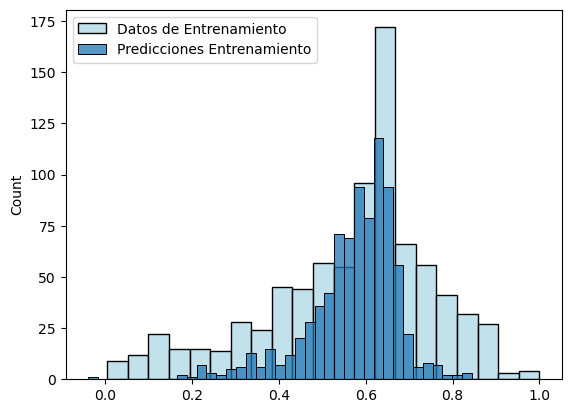

In [40]:
r2_train_3 = r2_score(y_train_desc, pred_train_desc_3)
mae_train_3 = mean_absolute_error(y_train_desc, pred_train_desc_3)
rmse_train_3 = root_mean_squared_error(y_train_desc, pred_train_desc_3)
mape_train_3 = mean_absolute_percentage_error(y_train_desc, pred_train_desc_3)

print(f'R2 entrenamiento: {r2_train_3}')
print(f'MAE entrenamiento: {mae_train_3}')
print(f'RMSE entrenamiento: {rmse_train_3}')
print(f'MAPE entrenamiento: {mape_train_3}')

sns.histplot(y_train_desc.values.flatten(), label='Datos de Entrenamiento', color='lightblue')
sns.histplot(pred_train_desc_3.flatten(), label='Predicciones Entrenamiento')
plt.legend()
plt.show()

R2 prueba: 0.08616345865666308
MAE prueba: 0.1278174881439379
RMSE prueba: 0.17826553472819753
MAPE prueba: 6356777079065.427


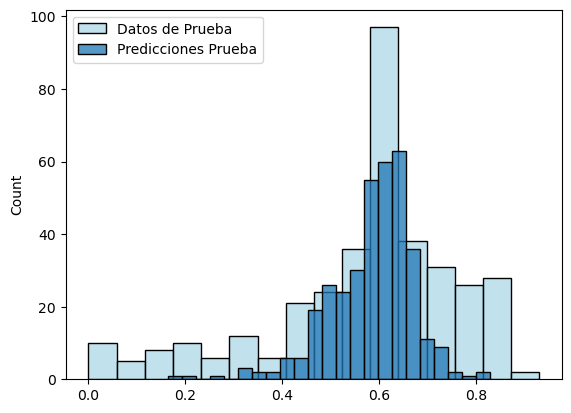

In [41]:
r2_test_3 = r2_score(y_test_desc, pred_test_desc_2)
mae_test_3 = mean_absolute_error(y_test_desc, pred_test_desc_3)
rmse_test_3 = root_mean_squared_error(y_test_desc, pred_test_desc_3)
mape_test_3 = mean_absolute_percentage_error(y_test_desc, pred_test_desc_3)

print(f'R2 prueba: {r2_test_3}')
print(f'MAE prueba: {mae_test_3}')
print(f'RMSE prueba: {rmse_test_3}')
print(f'MAPE prueba: {mape_test_3}')

sns.histplot(y_test_desc.values.flatten(), label='Datos de Prueba', color='lightblue')
sns.histplot(pred_test_desc_3.flatten(), label='Predicciones Prueba')
plt.legend()
plt.show()

### Árboles de regresión

- Clasificación: Identificación de hojas puras (Solo tiene individuos de una clase)
- Regresión: Tiene una zona de respuesta de la posible variable y, busca mediante identificación de hojas puras a traves de la reducción del error
- Arbol puro (Error -> 0): Cada hoja tiene 1 solo individuo

In [42]:
modelo_4 = DecisionTreeRegressor(random_state=123)
param_grid = {'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error'], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 3], 'max_leaf_nodes': [None, 2, 3, 4]}
reg_4 = GridSearchCV(modelo_4, param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_4.fit(X_train, y_train)
validation = pd.concat([pd.DataFrame(reg_4.cv_results_['params']), 
                        pd.DataFrame(reg_4.cv_results_['mean_test_score'], columns= ['MAPE'])], axis = 1)
validation.sort_values('MAPE', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,MAPE
121,absolute_error,20.0,NaN,3,-0.653360
113,absolute_error,10.0,NaN,3,-0.654081
112,absolute_error,10.0,NaN,2,-0.657519
97,absolute_error,NaN,NaN,3,-0.659457
65,squared_error,NaN,NaN,3,-0.663258
...,...,...,...,...,...
122,absolute_error,20.0,2.0,2,-0.816077
123,absolute_error,20.0,2.0,3,-0.816077
98,absolute_error,NaN,2.0,2,-0.816077
99,absolute_error,NaN,2.0,3,-0.816077


In [43]:
modelo_4_final = reg_4.best_estimator_
modelo_4_final

DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_split=3, random_state=123)

In [44]:
pred_train_4 = modelo_4_final.predict(X_train)
pred_test_4 = modelo_4_final.predict(X_test)
# Descalamiento con fórmula matemática
pred_train_desc_4 = pred_train_4 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc_4 = pred_test_4 * (np.max(y) - np.min(y)) + np.min(y)
y_train_desc = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc = y_test * (np.max(y) - np.min(y)) + np.min(y)

R2 entrenamiento: 0.9712157944161044
MAE entrenamiento: 0.012353908786329549
RMSE entrenamiento: 0.03318155437076089
MAPE entrenamiento: 0.0599796822267604


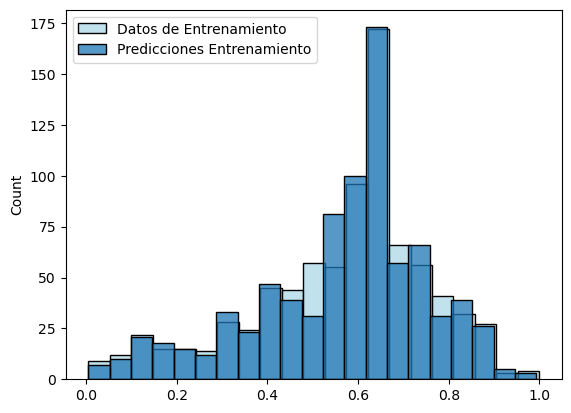

In [45]:
r2_train_4 = r2_score(y_train_desc, pred_train_desc_4)
mae_train_4 = mean_absolute_error(y_train_desc, pred_train_desc_4)
rmse_train_4 = root_mean_squared_error(y_train_desc, pred_train_desc_4)
mape_train_4 = mean_absolute_percentage_error(y_train_desc, pred_train_desc_4)

print(f'R2 entrenamiento: {r2_train_4}')
print(f'MAE entrenamiento: {mae_train_4}')
print(f'RMSE entrenamiento: {rmse_train_4}')
print(f'MAPE entrenamiento: {mape_train_4}')

sns.histplot(y_train_desc.values.flatten(), label='Datos de Entrenamiento', color='lightblue')
sns.histplot(pred_train_desc_4.flatten(), label='Predicciones Entrenamiento')
plt.legend()
plt.show()

R2 prueba: -0.21479279974519438
MAE prueba: 0.14159559502574892
RMSE prueba: 0.21938443204520652
MAPE prueba: 3190483724088.3765


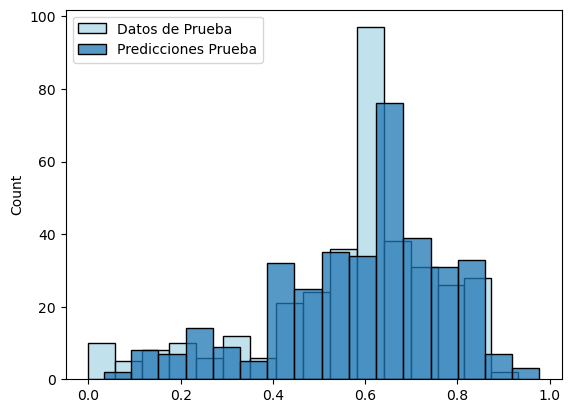

In [46]:
r2_test_4 = r2_score(y_test_desc, pred_test_desc_4)
mae_test_4 = mean_absolute_error(y_test_desc, pred_test_desc_4)
rmse_test_4 = root_mean_squared_error(y_test_desc, pred_test_desc_4)
mape_test_4 = mean_absolute_percentage_error(y_test_desc, pred_test_desc_4)

print(f'R2 prueba: {r2_test_4}')
print(f'MAE prueba: {mae_test_4}')
print(f'RMSE prueba: {rmse_test_4}')
print(f'MAPE prueba: {mape_test_4}')

sns.histplot(y_test_desc.values.flatten(), label='Datos de Prueba', color='lightblue')
sns.histplot(pred_test_desc_4.flatten(), label='Predicciones Prueba')
plt.legend()
plt.show()

### Bosques Aleatorios

- Método de ensamble de tipo Bagging

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
modelo_5 = RandomForestRegressor(random_state=123)
param_grid = {'criterion': ['friedman_mse', 'poisson', 'squared_error', 'absolute_error'],
              'max_depth': [None, 5, 10, 20], 'max_leaf_nodes': [None, 2, 3, 4], 'n_estimators': [100, 200, 300]}
reg_5 = GridSearchCV(modelo_5, param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_5.fit(X_train, y_train)
validation = pd.concat([pd.DataFrame(reg_5.cv_results_['params']), 
                        pd.DataFrame(reg_5.cv_results_['mean_test_score'], columns= ['MAPE'])], axis = 1)
validation.sort_values('MAPE', ascending=False)

In [52]:
# modelo_5_final = reg_5.best_estimator_
modelo_5_final = RandomForestRegressor(criterion='poisson', max_depth=100, n_estimators=600, random_state=123)
modelo_5_final.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson', max_depth=100, n_estimators=600,
                      random_state=123)

In [53]:
pred_train_5 = modelo_5_final.predict(X_train)
pred_test_5 = modelo_5_final.predict(X_test)
# Descalamiento con fórmula matemática
pred_train_desc_5 = pred_train_5 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc_5 = pred_test_5 * (np.max(y) - np.min(y)) + np.min(y)
y_train_desc = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc = y_test * (np.max(y) - np.min(y)) + np.min(y)

R2 entrenamiento: 0.9238961207610374
MAE entrenamiento: 0.03586715200429997
RMSE entrenamiento: 0.053953919523262055
MAPE entrenamiento: 0.22465394797800348


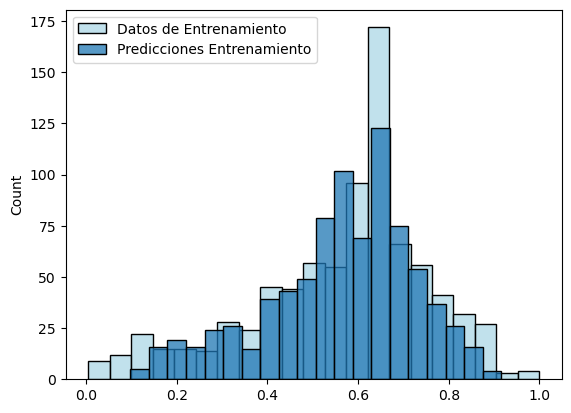

In [54]:
r2_train_5 = r2_score(y_train_desc, pred_train_desc_5)
mae_train_5 = mean_absolute_error(y_train_desc, pred_train_desc_5)
rmse_train_5 = root_mean_squared_error(y_train_desc, pred_train_desc_5)
mape_train_5 = mean_absolute_percentage_error(y_train_desc, pred_train_desc_5)

print(f'R2 entrenamiento: {r2_train_5}')
print(f'MAE entrenamiento: {mae_train_5}')
print(f'RMSE entrenamiento: {rmse_train_5}')
print(f'MAPE entrenamiento: {mape_train_5}')

sns.histplot(y_train_desc.values.flatten(), label='Datos de Entrenamiento', color='lightblue')
sns.histplot(pred_train_desc_5.flatten(), label='Predicciones Entrenamiento')
plt.legend()
plt.show()

R2 prueba: -0.21479279974519438
MAE prueba: 0.10437410350194957
RMSE prueba: 0.15416460209249017
MAPE prueba: 4643576082392.745


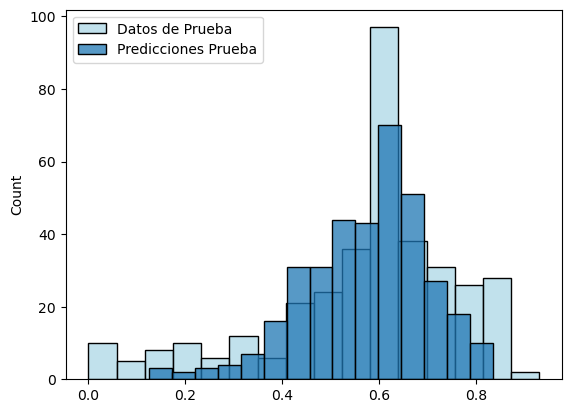

In [55]:
r2_test_5 = r2_score(y_test_desc, pred_test_desc_4)
mae_test_5 = mean_absolute_error(y_test_desc, pred_test_desc_5)
rmse_test_5 = root_mean_squared_error(y_test_desc, pred_test_desc_5)
mape_test_5 = mean_absolute_percentage_error(y_test_desc, pred_test_desc_5)

print(f'R2 prueba: {r2_test_5}')
print(f'MAE prueba: {mae_test_5}')
print(f'RMSE prueba: {rmse_test_5}')
print(f'MAPE prueba: {mape_test_5}')

sns.histplot(y_test_desc.values.flatten(), label='Datos de Prueba', color='lightblue')
sns.histplot(pred_test_desc_5.flatten(), label='Predicciones Prueba')
plt.legend()
plt.show()

### Adaptative Boosting

- Modelo de ensamble

In [56]:
from sklearn.ensemble import AdaBoostRegressor
modelo_6 = AdaBoostRegressor()
param_grid = {'estimator': [DecisionTreeRegressor(), KNeighborsRegressor()], 'n_estimators': [100, 200, 400], 'loss': ['linear', 'square', 'exponential'], 'learning_rate': [0.001, 0.1, 1, 10]}
reg_6 = GridSearchCV(modelo_6, param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_6.fit(X_train, y_train)
validation = pd.concat([pd.DataFrame(reg_6.cv_results_['params']), 
                        pd.DataFrame(reg_6.cv_results_['mean_test_score'], columns= ['MAPE'])], axis = 1)
validation.sort_values('MAPE', ascending=False)

,estimator,learning_rate,loss,n_estimators,MAPE
22,DecisionTreeRegressor(),1.000,square,200,-0.607404
23,DecisionTreeRegressor(),1.000,square,400,-0.618458
1,DecisionTreeRegressor(),0.001,linear,200,-0.624273
4,DecisionTreeRegressor(),0.001,square,200,-0.625571
13,DecisionTreeRegressor(),0.100,square,200,-0.629419
...,...,...,...,...,...
32,DecisionTreeRegressor(),10.000,square,400,-1.411704
31,DecisionTreeRegressor(),10.000,square,200,-1.411845
68,KNeighborsRegressor(),10.000,square,400,-1.431097
67,KNeighborsRegressor(),10.000,square,200,-1.432068


In [57]:
modelo_6_final = reg_6.best_estimator_
modelo_6_final

AdaBoostRegressor(estimator=DecisionTreeRegressor(), learning_rate=1,
                  loss='square', n_estimators=200)

In [58]:
pred_train_6 = modelo_6_final.predict(X_train)
pred_test_6 = modelo_6_final.predict(X_test)
# Descalamiento con fórmula matemática
pred_train_desc_6 = pred_train_6 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc_6 = pred_test_6 * (np.max(y) - np.min(y)) + np.min(y)
y_train_desc = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc = y_test * (np.max(y) - np.min(y)) + np.min(y)

R2 entrenamiento: 0.9721572754872333
MAE entrenamiento: 0.011938724787369803
RMSE entrenamiento: 0.03263438762357547
MAPE entrenamiento: 0.021933939759686206


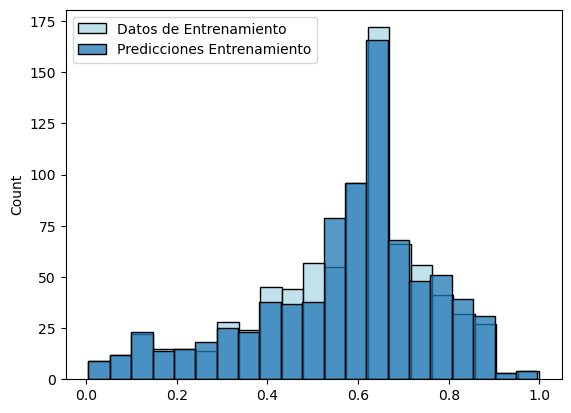

In [59]:
r2_train_6 = r2_score(y_train_desc, pred_train_desc_6)
mae_train_6 = mean_absolute_error(y_train_desc, pred_train_desc_6)
rmse_train_6 = root_mean_squared_error(y_train_desc, pred_train_desc_6)
mape_train_6 = mean_absolute_percentage_error(y_train_desc, pred_train_desc_6)

print(f'R2 entrenamiento: {r2_train_6}')
print(f'MAE entrenamiento: {mae_train_6}')
print(f'RMSE entrenamiento: {rmse_train_6}')
print(f'MAPE entrenamiento: {mape_train_6}')

sns.histplot(y_train_desc.values.flatten(), label='Datos de Entrenamiento', color='lightblue')
sns.histplot(pred_train_desc_6.flatten(), label='Predicciones Entrenamiento')
plt.legend()
plt.show()

R2 prueba: 0.3836134910550829
MAE prueba: 0.0962424521880522
RMSE prueba: 0.1562720335711148
MAPE prueba: 4564594728512.048


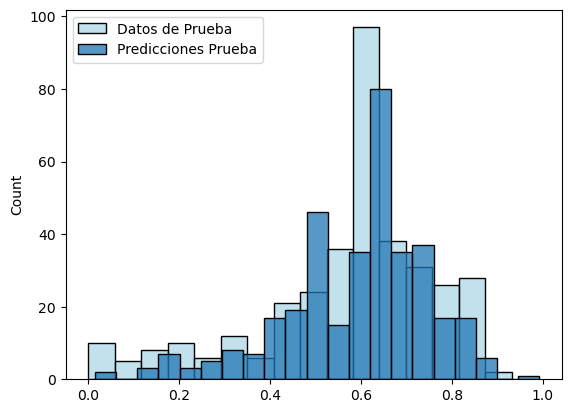

In [60]:
r2_test_6 = r2_score(y_test_desc, pred_test_desc_6)
mae_test_6 = mean_absolute_error(y_test_desc, pred_test_desc_6)
rmse_test_6 = root_mean_squared_error(y_test_desc, pred_test_desc_6)
mape_test_6 = mean_absolute_percentage_error(y_test_desc, pred_test_desc_6)

print(f'R2 prueba: {r2_test_6}')
print(f'MAE prueba: {mae_test_6}')
print(f'RMSE prueba: {rmse_test_6}')
print(f'MAPE prueba: {mape_test_6}')

sns.histplot(y_test_desc.values.flatten(), label='Datos de Prueba', color='lightblue')
sns.histplot(pred_test_desc_6.flatten(), label='Predicciones Prueba')
plt.legend()
plt.show()

### GradientBoosting

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
modelo_7 = GradientBoostingRegressor()
# loss: ['squared_error', 'absolute_error', 'huber', 'quantile']
param_grid = {'loss': ['squared_error', 'absolute_error'], 'n_estimators': [100, 200, 300, 900], 'criterion': ['friedman_mse', 'squared_error']}
reg_7 = GridSearchCV(modelo_7, param_grid, cv=3, scoring='neg_mean_absolute_percentage_error')
reg_7.fit(X_train, y_train)
validation = pd.concat([pd.DataFrame(reg_7.cv_results_['params']), 
                        pd.DataFrame(reg_7.cv_results_['mean_test_score'], columns= ['MAPE'])], axis = 1)
validation.sort_values('MAPE', ascending=False)

,criterion,loss,n_estimators,MAPE
3,friedman_mse,squared_error,900,-0.510086
11,squared_error,squared_error,900,-0.511294
10,squared_error,squared_error,300,-0.532194
2,friedman_mse,squared_error,300,-0.532644
9,squared_error,squared_error,200,-0.546652
1,friedman_mse,squared_error,200,-0.547092
8,squared_error,squared_error,100,-0.578912
0,friedman_mse,squared_error,100,-0.579935
7,friedman_mse,absolute_error,900,-0.671804
13,squared_error,absolute_error,200,-0.682605


In [63]:
modelo_7_r = GradientBoostingRegressor()
# loss: ['squared_error', 'absolute_error', 'huber', 'quantile']
param_grid_r = {'loss': ['squared_error', 'absolute_error'], 'n_estimators': [100, 200, 300, 900], 'criterion': ['friedman_mse', 'squared_error']}
reg_7_r = RandomizedSearchCV(modelo_7_r, param_grid_r, cv=3, scoring='neg_mean_absolute_percentage_error', n_iter=10)
reg_7_r.fit(X_train, y_train)
validation = pd.concat([pd.DataFrame(reg_7_r.cv_results_['params']), 
                        pd.DataFrame(reg_7_r.cv_results_['mean_test_score'], columns= ['MAPE'])], axis = 1)
validation.sort_values('MAPE', ascending=False)

,n_estimators,loss,criterion,MAPE
7,900,squared_error,squared_error,-0.509703
3,900,squared_error,friedman_mse,-0.511119
0,300,squared_error,friedman_mse,-0.531814
4,300,squared_error,squared_error,-0.532304
9,100,squared_error,friedman_mse,-0.579712
6,900,absolute_error,friedman_mse,-0.691195
2,200,absolute_error,squared_error,-0.692387
8,300,absolute_error,friedman_mse,-0.696027
5,300,absolute_error,squared_error,-0.696663
1,100,absolute_error,friedman_mse,-0.701168


In [64]:
modelo_7_final = reg_7.best_estimator_
modelo_7_final

GradientBoostingRegressor(n_estimators=900)

In [65]:
pred_train_7 = modelo_7_final.predict(X_train)
pred_test_7 = modelo_7_final.predict(X_test)
# Descalamiento con fórmula matemática
pred_train_desc_7 = pred_train_7 * (np.max(y) - np.min(y)) + np.min(y)
pred_test_desc_7 = pred_test_7 * (np.max(y) - np.min(y)) + np.min(y)
y_train_desc = y_train * (np.max(y) - np.min(y)) + np.min(y)
y_test_desc = y_test * (np.max(y) - np.min(y)) + np.min(y)

R2 entrenamiento: 0.9293618238755821
MAE entrenamiento: 0.03279432126514439
RMSE entrenamiento: 0.05198036696233653
MAPE entrenamiento: 0.15468612597140477


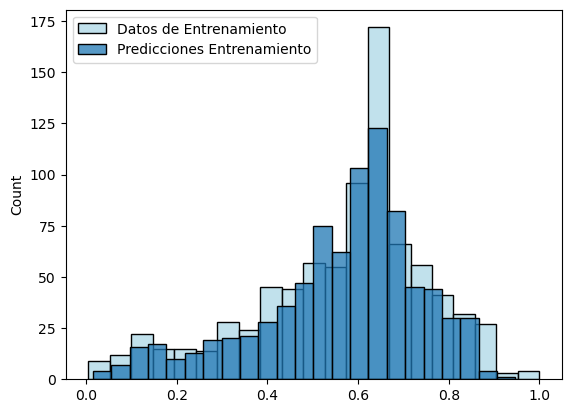

In [66]:
r2_train_7 = r2_score(y_train_desc, pred_train_desc_7)
mae_train_7 = mean_absolute_error(y_train_desc, pred_train_desc_7)
rmse_train_7 = root_mean_squared_error(y_train_desc, pred_train_desc_7)
mape_train_7 = mean_absolute_percentage_error(y_train_desc, pred_train_desc_7)

print(f'R2 entrenamiento: {r2_train_7}')
print(f'MAE entrenamiento: {mae_train_7}')
print(f'RMSE entrenamiento: {rmse_train_7}')
print(f'MAPE entrenamiento: {mape_train_7}')

sns.histplot(y_train_desc.values.flatten(), label='Datos de Entrenamiento', color='lightblue')
sns.histplot(pred_train_desc_7.flatten(), label='Predicciones Entrenamiento')
plt.legend()
plt.show()

R2 prueba: 0.42472698583827206
MAE prueba: 0.10303961959346403
RMSE prueba: 0.15097036405669037
MAPE prueba: 5419523213641.626


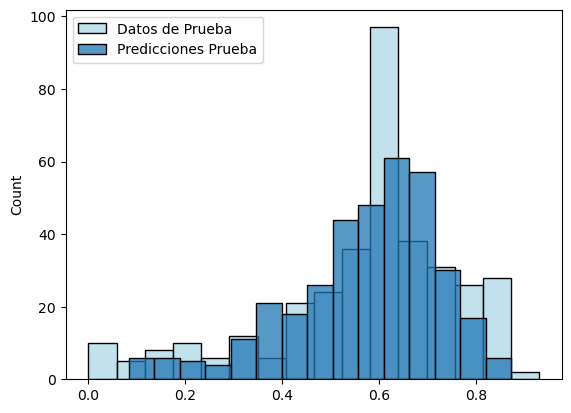

In [67]:
r2_test_7 = r2_score(y_test_desc, pred_test_desc_7)
mae_test_7 = mean_absolute_error(y_test_desc, pred_test_desc_7)
rmse_test_7 = root_mean_squared_error(y_test_desc, pred_test_desc_7)
mape_test_7 = mean_absolute_percentage_error(y_test_desc, pred_test_desc_7)

print(f'R2 prueba: {r2_test_7}')
print(f'MAE prueba: {mae_test_7}')
print(f'RMSE prueba: {rmse_test_7}')
print(f'MAPE prueba: {mape_test_7}')

sns.histplot(y_test_desc.values.flatten(), label='Datos de Prueba', color='lightblue')
sns.histplot(pred_test_desc_7.flatten(), label='Predicciones Prueba')
plt.legend()
plt.show()

### Redes Neuronales Artificales

In [68]:
from sklearn.neural_network import MLPRegressor

In [ ]:
modelo_8 = MLPRegressor(random_state=123)
param_grid = {'hidden_layer_sizes': [(10,), (10, 10), (10, 10, 10), (20, 10)], 'activation': ['logistic', 'tanh', 'relu'], 'learning_rate_init': [0.001, 0.01, 1, 10], 'solver': ['lbfgs', 'sgd', 'adam'], 'max_iter': [200, 300, 400]}
reg_8 = RandomizedSearchCV(modelo_8, param_grid, cv=3, scoring='neg_mean_absolute_percentage_error', n_iter=150, n_jobs=-1)
reg_8.fit(X_train, y_train)
validation = pd.concat([pd.DataFrame(reg_8.cv_results_['params']), 
                        pd.DataFrame(reg_8.cv_results_['mean_test_score'], columns= ['MAPE'])], axis = 1)
validation.sort_values('MAPE', ascending=False)

/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/loperatomas410/anaconda3/envs/data/lib/python3.1

,solver,max_iter,learning_rate_init,hidden_layer_sizes,activation,MAPE
29,adam,400,0.01,"(10, 10, 10)",relu,-7.290906e-01
2,adam,400,0.01,"(10, 10, 10)",tanh,-7.312761e-01
110,adam,200,0.01,"(10, 10, 10)",tanh,-7.312761e-01
61,lbfgs,400,0.01,"(10, 10)",logistic,-7.336437e-01
147,lbfgs,400,10.00,"(10, 10)",logistic,-7.336437e-01
...,...,...,...,...,...,...
143,sgd,200,10.00,"(10, 10)",logistic,-4.530164e+45
146,sgd,300,10.00,"(20, 10)",relu,-6.230232e+60
12,sgd,400,10.00,"(20, 10)",tanh,-4.689618e+81
133,sgd,200,10.00,"(10, 10, 10)",tanh,-7.463528e+81
